# NEQR (Novel Enhanced Quantum Representation)

## Imports

In [1]:
import matplotlib.pyplot as plt

from neqr import NEQR
from qiskit import execute
from qiskit.providers.aer.backends import AerSimulator
from qiskit.quantum_info import Statevector
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize

## Definitions

In [2]:
neqr_class = NEQR()
backend = AerSimulator()
shots = 2**14

## Importing a picture of an astronaut from Scikit-image

Resizing the original picture `(512,512,3)` to `(32,32)` and converting the RGB image to gray scale

In [3]:
astro_pic = resize(data.astronaut(), (32,32))
gray_astro_pic = rgb2gray(astro_pic)

Image after transformations

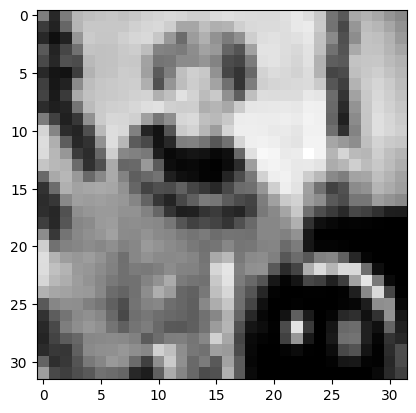

In [4]:
plt.imshow(gray_astro_pic, cmap="gray")

Encoding the image above in a NEQR circuit and reconstructing the original image from the counts obtained through experiments with NEQR circuit.

In [5]:
qc_gray = neqr_class.image_quantum_circuit(image=gray_astro_pic, measurements=True)
counts = backend.run(qc_gray, shots=shots).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=gray_astro_pic.shape)

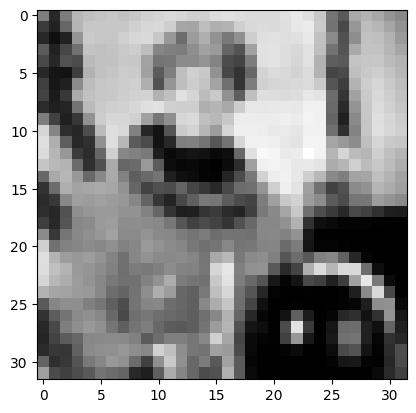

In [6]:
plt.imshow(image, cmap="gray")

## Negative Image

In [7]:
qc_gray = neqr_class.image_quantum_circuit(image=gray_astro_pic)
qc_gray.x(qubit=qc_gray.qregs[0])
qc_gray.measure(qubit=qc_gray.qregs[0], cbit=qc_gray.cregs[0])
qc_gray.measure(qubit=qc_gray.qregs[1], cbit=qc_gray.cregs[1])
counts = backend.run(qc_gray, shots=shots).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=gray_astro_pic.shape)

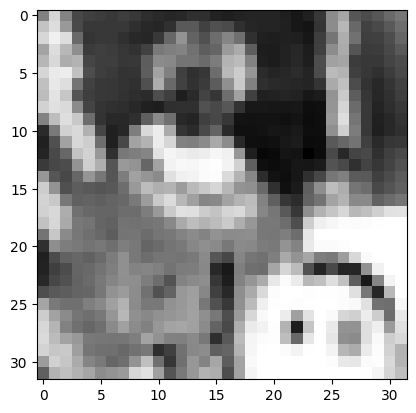

In [9]:
plt.imshow(image, cmap="gray")

## Mirroring image in NEQR circuits

In [10]:
qc_gray = neqr_class.image_quantum_circuit(image=gray_astro_pic)
qc_gray.x(qubit=qc_gray.qregs[1][:int(qc_gray.qregs[1].size/2)])
qc_gray.measure(qubit=qc_gray.qregs[0], cbit=qc_gray.cregs[0])
qc_gray.measure(qubit=qc_gray.qregs[1], cbit=qc_gray.cregs[1])
counts = backend.run(qc_gray, shots=shots).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=gray_astro_pic.shape)

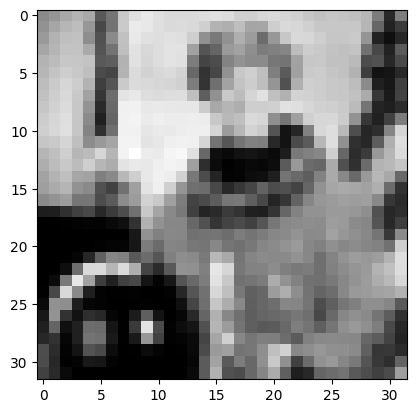

In [11]:
plt.imshow(image, cmap="gray")

In [12]:
qc_gray = neqr_class.image_quantum_circuit(image=gray_astro_pic)
qc_gray.x(qubit=qc_gray.qregs[1][int(qc_gray.qregs[1].size/2):])
qc_gray.measure(qubit=qc_gray.qregs[0], cbit=qc_gray.cregs[0])
qc_gray.measure(qubit=qc_gray.qregs[1], cbit=qc_gray.cregs[1])
counts = backend.run(qc_gray, shots=shots).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=gray_astro_pic.shape)

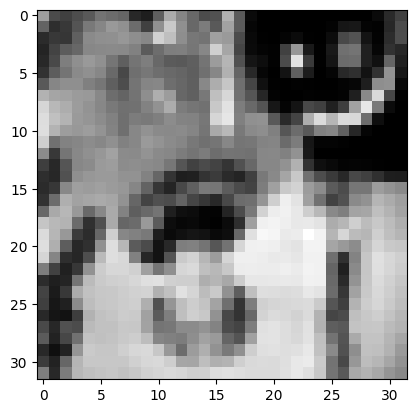

In [13]:
plt.imshow(image, cmap="gray")

In [14]:
qc_gray = neqr_class.image_quantum_circuit(image=gray_astro_pic)
qc_gray.x(qubit=qc_gray.qregs[1])
qc_gray.measure(qubit=qc_gray.qregs[0], cbit=qc_gray.cregs[0])
qc_gray.measure(qubit=qc_gray.qregs[1], cbit=qc_gray.cregs[1])
counts = backend.run(qc_gray, shots=shots).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=gray_astro_pic.shape)

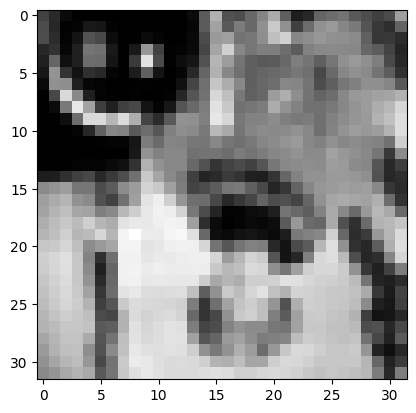

In [15]:
plt.imshow(image, cmap="gray")

In [16]:
qc_gray = neqr_class.image_quantum_circuit(image=gray_astro_pic)
qc_gray.x(qubit=qc_gray.qregs[0])
qc_gray.x(qubit=qc_gray.qregs[1])
qc_gray.measure(qubit=qc_gray.qregs[0], cbit=qc_gray.cregs[0])
qc_gray.measure(qubit=qc_gray.qregs[1], cbit=qc_gray.cregs[1])
counts = backend.run(qc_gray, shots=shots).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=gray_astro_pic.shape)

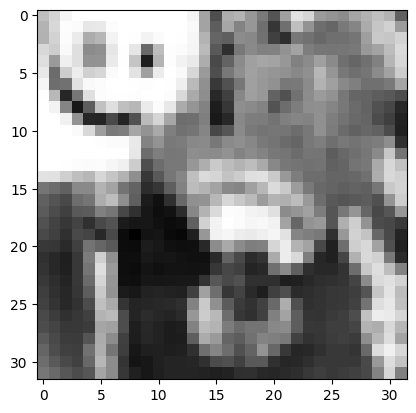

In [17]:
plt.imshow(image, cmap="gray")

In [8]:
gray_astro_pic_full_size = rgb2gray(data.astronaut())
qc_gray = neqr_class.image_quantum_circuit(image=gray_astro_pic_full_size, measurements=True)

In [9]:
print(f"Number of qubits: {qc_gray.qregs[0].size + qc_gray.qregs[1].size}")
print(f"Circuit size: {qc_gray.size()}")
print(f"Circuit depth: {qc_gray.depth()}")
print(f"Circuit ops: {qc_gray.count_ops()}")

Number of qubits: 26
Circuit size: 5185661
Circuit depth: 1370582
Circuit ops: OrderedDict([('x', 4281068), ('mcx_gray', 904549), ('barrier', 233017), ('measure', 26), ('h', 18)])


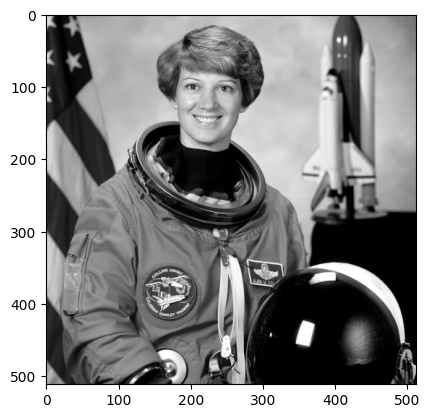

In [10]:
plt.imshow(gray_astro_pic_full_size, cmap="gray")

## RGB Image

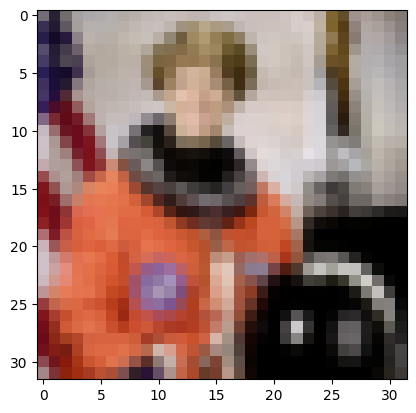

In [18]:
plt.imshow(astro_pic)

In [23]:
qc_rgb = neqr_class.image_quantum_circuit(image=astro_pic, measurements=True)
counts = backend.run(qc_rgb, shots=shots*4).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=astro_pic.shape)

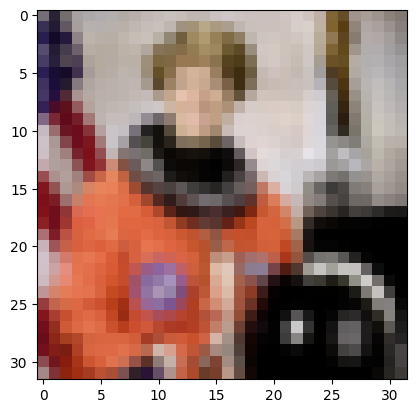

In [24]:
plt.imshow(image)

In [25]:
qc_rgb = neqr_class.image_quantum_circuit(image=astro_pic)
qc_rgb.x(qubit=qc_rgb.qregs[1][:int(qc_rgb.qregs[1].size/2)])
qc_rgb.measure(qubit=qc_rgb.qregs[0], cbit=qc_rgb.cregs[0])
qc_rgb.measure(qubit=qc_rgb.qregs[1], cbit=qc_rgb.cregs[1])
qc_rgb.measure(qubit=qc_rgb.qregs[2], cbit=qc_rgb.cregs[2])
counts = backend.run(qc_rgb, shots=shots*4).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=astro_pic.shape)

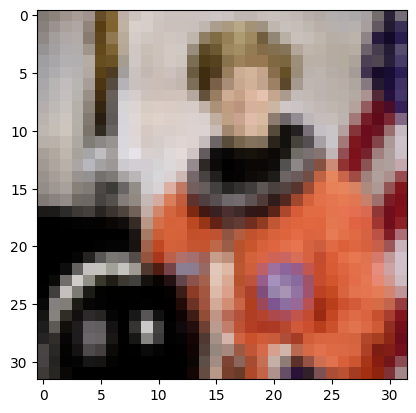

In [26]:
plt.imshow(image)

In [27]:
qc_rgb = neqr_class.image_quantum_circuit(image=astro_pic)
qc_rgb.x(qubit=qc_rgb.qregs[1][int(qc_rgb.qregs[1].size/2):])
qc_rgb.measure(qubit=qc_rgb.qregs[0], cbit=qc_rgb.cregs[0])
qc_rgb.measure(qubit=qc_rgb.qregs[1], cbit=qc_rgb.cregs[1])
qc_rgb.measure(qubit=qc_rgb.qregs[2], cbit=qc_rgb.cregs[2])
counts = backend.run(qc_rgb, shots=shots*4).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=astro_pic.shape)

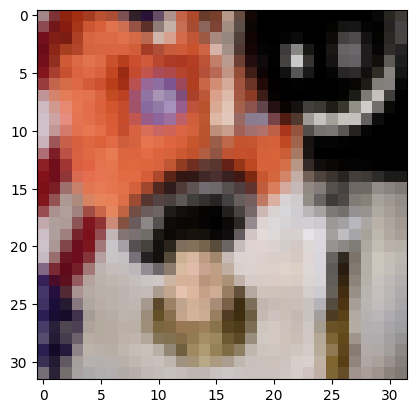

In [28]:
plt.imshow(image)

In [29]:
qc_rgb = neqr_class.image_quantum_circuit(image=astro_pic)
qc_rgb.x(qubit=qc_rgb.qregs[1])
qc_rgb.measure(qubit=qc_rgb.qregs[0], cbit=qc_rgb.cregs[0])
qc_rgb.measure(qubit=qc_rgb.qregs[1], cbit=qc_rgb.cregs[1])
qc_rgb.measure(qubit=qc_rgb.qregs[2], cbit=qc_rgb.cregs[2])
counts = backend.run(qc_rgb, shots=shots*4).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=astro_pic.shape)

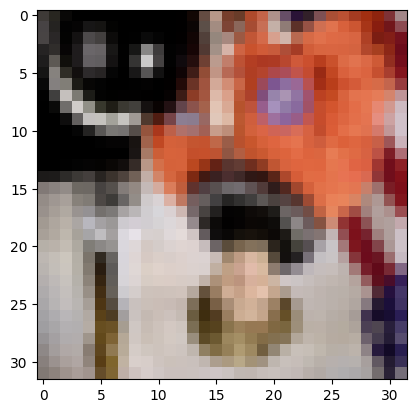

In [30]:
plt.imshow(image)

In [31]:
qc_rgb = neqr_class.image_quantum_circuit(image=astro_pic)
qc_rgb.x(qubit=qc_rgb.qregs[0])
qc_rgb.measure(qubit=qc_rgb.qregs[0], cbit=qc_rgb.cregs[0])
qc_rgb.measure(qubit=qc_rgb.qregs[1], cbit=qc_rgb.cregs[1])
qc_rgb.measure(qubit=qc_rgb.qregs[2], cbit=qc_rgb.cregs[2])
counts = backend.run(qc_rgb, shots=shots*4).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=astro_pic.shape)

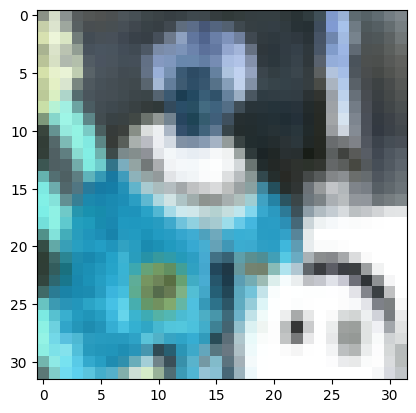

In [32]:
plt.imshow(image)

In [40]:
qc_rgb = neqr_class.image_quantum_circuit(image=astro_pic)
qc_rgb.x(qubit=qc_rgb.qregs[2])
for i in range(8):
    qc_rgb.mct(control_qubits=qc_rgb.qregs[2], target_qubit=qc_rgb.qregs[0][i])
qc_rgb.x(qubit=qc_rgb.qregs[2])
qc_rgb.measure(qubit=qc_rgb.qregs[0], cbit=qc_rgb.cregs[0])
qc_rgb.measure(qubit=qc_rgb.qregs[1], cbit=qc_rgb.cregs[1])
qc_rgb.measure(qubit=qc_rgb.qregs[2], cbit=qc_rgb.cregs[2])
counts = backend.run(qc_rgb, shots=shots*4).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=astro_pic.shape)

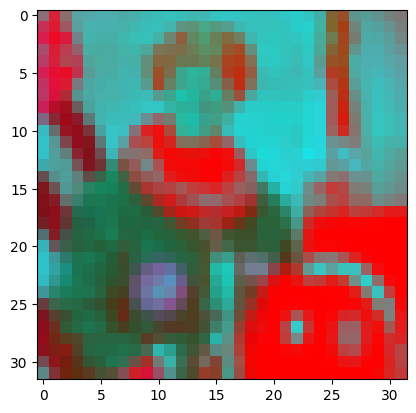

In [41]:
plt.imshow(image)

In [42]:
qc_rgb = neqr_class.image_quantum_circuit(image=astro_pic)
qc_rgb.x(qubit=qc_rgb.qregs[2][1])
for i in range(8):
    qc_rgb.mct(control_qubits=qc_rgb.qregs[2], target_qubit=qc_rgb.qregs[0][i])
qc_rgb.x(qubit=qc_rgb.qregs[2][1])
qc_rgb.measure(qubit=qc_rgb.qregs[0], cbit=qc_rgb.cregs[0])
qc_rgb.measure(qubit=qc_rgb.qregs[1], cbit=qc_rgb.cregs[1])
qc_rgb.measure(qubit=qc_rgb.qregs[2], cbit=qc_rgb.cregs[2])
counts = backend.run(qc_rgb, shots=shots*4).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=astro_pic.shape)

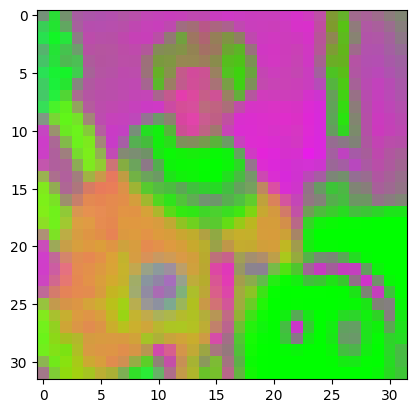

In [43]:
plt.imshow(image)

In [44]:
qc_rgb = neqr_class.image_quantum_circuit(image=astro_pic)
qc_rgb.x(qubit=qc_rgb.qregs[2][0])
for i in range(8):
    qc_rgb.mct(control_qubits=qc_rgb.qregs[2], target_qubit=qc_rgb.qregs[0][i])
qc_rgb.x(qubit=qc_rgb.qregs[2][0])
qc_rgb.measure(qubit=qc_rgb.qregs[0], cbit=qc_rgb.cregs[0])
qc_rgb.measure(qubit=qc_rgb.qregs[1], cbit=qc_rgb.cregs[1])
qc_rgb.measure(qubit=qc_rgb.qregs[2], cbit=qc_rgb.cregs[2])
counts = backend.run(qc_rgb, shots=shots*4).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=astro_pic.shape)

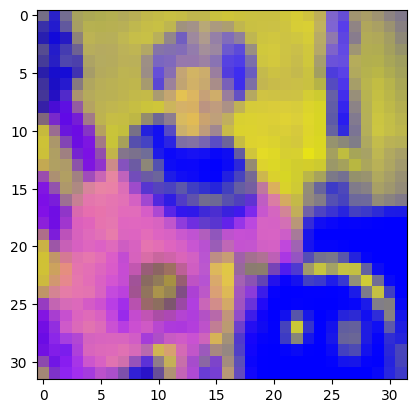

In [45]:
plt.imshow(image)

In [33]:
qc_rgb = neqr_class.image_quantum_circuit(image=astro_pic)
qc_rgb.x(qubit=qc_rgb.qregs[0])
qc_rgb.x(qubit=qc_rgb.qregs[1])
qc_rgb.measure(qubit=qc_rgb.qregs[0], cbit=qc_rgb.cregs[0])
qc_rgb.measure(qubit=qc_rgb.qregs[1], cbit=qc_rgb.cregs[1])
qc_rgb.measure(qubit=qc_rgb.qregs[2], cbit=qc_rgb.cregs[2])
counts = backend.run(qc_rgb, shots=shots*4).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=astro_pic.shape)

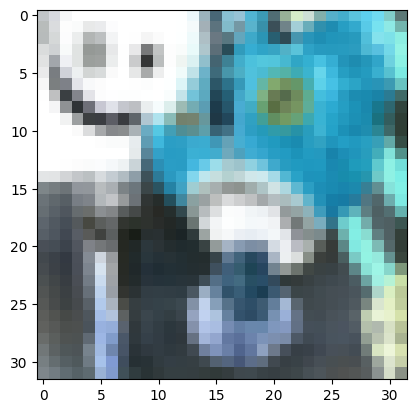

In [34]:
plt.imshow(image)

## Working with non square image

In [3]:
cat = data.cat()
cat_gray_resized = resize(rgb2gray(cat), (int(cat.shape[0]/10), int(cat.shape[1]/10)))

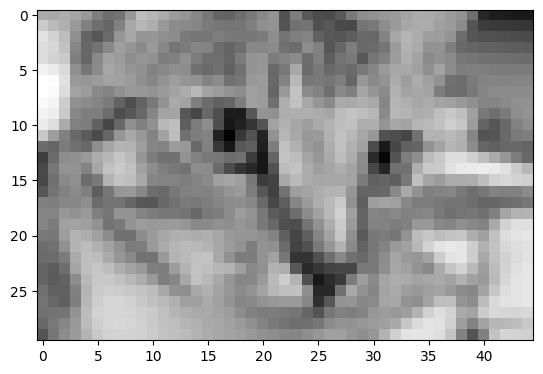

In [4]:
plt.imshow(cat_gray_resized, cmap="gray")

In [5]:
qc_gray = neqr_class.image_quantum_circuit(image=cat_gray_resized, measurements=True)
counts = backend.run(qc_gray, shots=shots).result().get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=cat_gray_resized.shape)

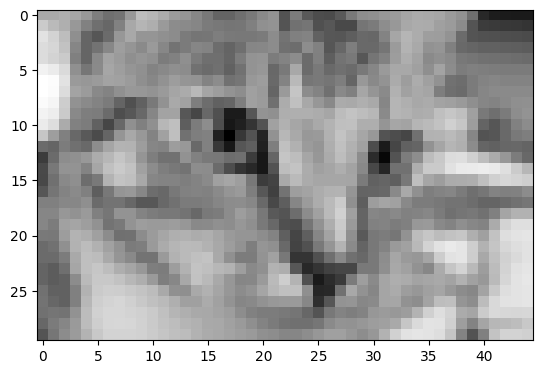

In [6]:
plt.imshow(image, cmap="gray")

In [7]:
print(f"Number of qubits: {qc_gray.qregs[0].size + qc_gray.qregs[1].size}")
print(f"Circuit size: {qc_gray.size()}")
print(f"Circuit depth: {qc_gray.depth()}")
print(f"Circuit ops: {qc_gray.count_ops()}")

Number of qubits: 19
Circuit size: 21639
Circuit depth: 8102
Circuit ops: OrderedDict([('x', 16210), ('mcx_gray', 5399), ('barrier', 1352), ('measure', 19), ('h', 11)])
